# Research on botnet attacks:

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBnTCcjUdfXOdNKziYJB4KcuntahlDQ-4f4jPVboMOW7a-nmeY)

## VAE on data

Distinguish between normal and anomalous data.

 ## 9 classes model.
 
The first model only accounts 9 classes of anomalies, which are:

- Backdoor	
- DoS	
- Exploits	
- Fuzzers	
- Generic	
- Normal	
- Reconnaissance	
- Shellcode	
- Worms

Accuracy reached between the 90 and the 98%
<br>
<br>
<br>
<br>

Epoch Number | Accuracy Train | Accuracy Validation
---|---|---
20|0.9697|0.9706
40|0.9532|0.9743
80|0.9724|0.9736
160|0.9546|0.9575

We need to improve feature engineering!

### Link to data repo:

[Here](https://cloudstor.aarnet.edu.au/plus/index.php/s/2DhnLGDdEECo4ys) one can find the official repository.

In [ ]:
!wget "https://cloudstor.aarnet.edu.au/plus/s/2DhnLGDdEECo4ys/download?path=%2FUNSW-NB15%20-%20CSV%20Files%2Fa%20part%20of%20training%20and%20testing%20set&files=UNSW_NB15_training-set.csv"
!wget "https://cloudstor.aarnet.edu.au/plus/s/2DhnLGDdEECo4ys/download?path=%2FUNSW-NB15%20-%20CSV%20Files%2Fa%20part%20of%20training%20and%20testing%20set&files=UNSW_NB15_testing-set.csv"
!wget "https://cloudstor.aarnet.edu.au/plus/s/2DhnLGDdEECo4ys/download?path=%2FUNSW-NB15%20-%20CSV%20Files&files=UNSW-NB15_1.csv"
!wget "https://cloudstor.aarnet.edu.au/plus/s/2DhnLGDdEECo4ys/download?path=%2FUNSW-NB15%20-%20CSV%20Files&files=UNSW-NB15_2.csv"
!wget "https://cloudstor.aarnet.edu.au/plus/s/2DhnLGDdEECo4ys/download?path=%2FUNSW-NB15%20-%20CSV%20Files&files=UNSW-NB15_3.csv"
!wget "https://cloudstor.aarnet.edu.au/plus/s/2DhnLGDdEECo4ys/download?path=%2FUNSW-NB15%20-%20CSV%20Files&files=UNSW-NB15_4.csv"
!wget "https://cloudstor.aarnet.edu.au/plus/s/2DhnLGDdEECo4ys/download?path=%2FUNSW-NB15%20-%20CSV%20Files&files=UNSW-NB15_LIST_EVENTS.csv"
!wget "https://cloudstor.aarnet.edu.au/plus/s/2DhnLGDdEECo4ys/download?path=%2FUNSW-NB15%20-%20CSV%20Files&files=NUSW-NB15_GT.csv"
!wget "https://cloudstor.aarnet.edu.au/plus/s/2DhnLGDdEECo4ys/download?path=%2FUNSW-NB15%20-%20CSV%20Files&files=NUSW-NB15_features.csv"

--2020-06-24 17:17:17--  https://cloudstor.aarnet.edu.au/plus/s/2DhnLGDdEECo4ys/download?path=%2FUNSW-NB15%20-%20CSV%20Files%2Fa%20part%20of%20training%20and%20testing%20set&files=UNSW_NB15_training-set.csv
Resolving cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)... 202.158.207.20
Connecting to cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)|202.158.207.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15380800 (15M) [text/csv]
Saving to: ‘download?path=%2FUNSW-NB15 - CSV Files%2Fa part of training and testing set&files=UNSW_NB15_training-set.csv’

download?path=%2FUN 100%[===================>]  14.67M  5.38MB/s    in 2.7s    

2020-06-24 17:17:21 (5.38 MB/s) - ‘download?path=%2FUNSW-NB15 - CSV Files%2Fa part of training and testing set&files=UNSW_NB15_training-set.csv’ saved [15380800/15380800]

--2020-06-24 17:17:22--  https://cloudstor.aarnet.edu.au/plus/s/2DhnLGDdEECo4ys/download?path=%2FUNSW-NB15%20-%20CSV%20Files%2Fa%20part%20of%20training%20and%20

In [ ]:
import os
import pandas as pd
import psutil
import humanize
import numpy as np
import tensorflow as tf
from keras.layers import Flatten,BatchNormalization,LSTM, Dense, Dropout,Conv1D,MaxPooling1D,Input,Reshape, Add, Activation, ZeroPadding1D, AveragePooling1D, Embedding
from keras.models import Sequential, Model
from keras.initializers import glorot_uniform
from keras.layers.embeddings import Embedding
import keras.backend as K
from keras.callbacks import History
from keras.optimizers import Adam,SGD,Adadelta,RMSprop
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import re
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import TruncatedSVD as tsvd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats as st


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
!ls

'download?path=%2FUNSW-NB15 - CSV Files'
'download?path=%2FUNSW-NB15 - CSV Files.1'
'download?path=%2FUNSW-NB15 - CSV Files.2'
'download?path=%2FUNSW-NB15 - CSV Files%2Fa part of training and testing set'
'download?path=%2FUNSW-NB15 - CSV Files%2Fa part of training and testing set.1'
'download?path=%2FUNSW-NB15 - CSV Files%2Fa part of training and testing set&files=UNSW_NB15_testing-set.csv'
'download?path=%2FUNSW-NB15 - CSV Files%2Fa part of training and testing set&files=UNSW_NB15_training-set.csv'
'download?path=%2FUNSW-NB15 - CSV Files.3'
'download?path=%2FUNSW-NB15 - CSV Files.4'
'download?path=%2FUNSW-NB15 - CSV Files.5'
'download?path=%2FUNSW-NB15 - CSV Files.6'
'download?path=%2FUNSW-NB15 - CSV Files&files=NUSW-NB15_features.csv'
'download?path=%2FUNSW-NB15 - CSV Files&files=NUSW-NB15_GT.csv'
'download?path=%2FUNSW-NB15 - CSV Files&files=UNSW-NB15_1.csv'
'download?path=%2FUNSW-NB15 - CSV Files&files=UNSW-NB15_2.csv'
'download?path=%2FUNSW-NB15 - CSV Files&files=UNSW-NB15_3.csv'

In [ ]:
pd.options.display.max_rows = 100000
pd.options.display.max_columns = 100000
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
files_data = [file for file in os.listdir() if file.endswith('.csv')]

In [ ]:
files_data

[]

In [ ]:
def data_loader(file_name):
  try:
    df_list = []
    for file_n in file_name:
      locals()[file_n.replace('.csv','')] = pd.read_csv(file)
      df_list.append(locals()[file_n.replace('.csv','')])
  except:
    raise Exception("Warning, file {} has generated the following error {}".format(file_n,str(sys.exc_info())))
  return df_list


In [ ]:
def df_shape(df):
  for d in df:
    print('Shape of {} is {} and has missing values:\n{}\n##############################\n'.format(d,globals()[d].shape,globals()[d].isna().sum()))

In [ ]:
file_names=[el for el in os.listdir() if el.endswith(".csv")]

In [ ]:
file_names

['UNSW-NB15_3.csv',
 'UNSW-NB15_4.csv',
 'UNSW_NB15_testing-set.csv',
 'UNSW-NB15_1.csv',
 'UNSW-NB15_LIST_EVENTS.csv',
 'UNSW_NB15_training-set.csv',
 'NUSW-NB15_features.csv',
 'UNSW-NB15_2.csv']

In [ ]:
pd.read_csv('UNSW_NB15_training-set.csv')

In [ ]:
data_list = data_loader(file_names)

Exception: ignored

In [ ]:
df_train = pd.read_csv(files_data[files_data.index('UNSW_NB15_training-set.csv')])
df_test = pd.read_csv(files_data[files_data.index('UNSW_NB15_testing-set.csv')])

- '0x000b'
- '0xc0a8'
- '0x000b'

In [ ]:
df_test.shape

(175341, 45)

In [ ]:
data = pd.concat([df_test,df_train])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
id                   257673 non-null int64
dur                  257673 non-null float64
proto                257673 non-null object
service              257673 non-null object
state                257673 non-null object
spkts                257673 non-null int64
dpkts                257673 non-null int64
sbytes               257673 non-null int64
dbytes               257673 non-null int64
rate                 257673 non-null float64
sttl                 257673 non-null int64
dttl                 257673 non-null int64
sload                257673 non-null float64
dload                257673 non-null float64
sloss                257673 non-null int64
dloss                257673 non-null int64
sinpkt               257673 non-null float64
dinpkt               257673 non-null float64
sjit                 257673 non-null float64
djit                 257673 non-null float64
swin      

In [ ]:
data.loc[(data.attack_cat == 'Worms')&(data.label == 0),].shape

(0, 45)

## Working on data:

- Get the text data into variables. We will do that by inserting feature selection, but in a second moment;
-  For now, we will go with LabelEncoder.

In [ ]:
data = data.drop_duplicates(keep='first',)

In [ ]:
data = data.reset_index()
data = data.drop(['index','id'],axis = 1)

In [ ]:
data.shape

(257673, 44)

In [ ]:
tgt0 = data.attack_cat
tgt2 = data.label
data.drop(['attack_cat','label'],axis=1,inplace=True)

In [ ]:
tgt0.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

-------------------------------------------------------

In [ ]:
data.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
count,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,6.582143e+05,4.889317,6.743691,912.300834,98.915462,5.419373e+03,582.251456,121.753661,1.006120e+09,1.002295e+09,119.254629,0.046038,0.023652,0.022386,137.639027,121.649703,0.102242,1.968900e+03,9.383176,1.324978,6.050467,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274
std,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,2.412372e+06,65.574953,53.702222,6922.153239,1094.048691,4.903450e+04,3930.153369,127.367443,1.367795e+09,1.363877e+09,127.230477,0.092908,0.053856,0.045771,205.901118,254.041013,0.710593,4.962523e+04,10.829706,0.992300,8.173749,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,1.747441e+03,0.000000,0.000000,0.381696,0.007000,6.736370e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000
75%,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,2.210538e+04,3.000000,2.000000,58.094727,56.438859,2.787367e+03,119.712937,255.000000,2.007375e+09,1.992752e+09,255.000000,0.082082,0.036842,0.044665,100.000000,89.000000,0.000000,0.000000e+00,12.000000,2.000000,6.000000,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,5319.000000,5507.000000,84371.496000,57739.240000,1.483831e+06,463199.240100,255.000000,4.294959e+09,4.294882e+09,255.000000,3.821465,3.226788,2.928778,1504.000000,1500.000000,172.000000,6.558056e+06,63.000000,6.000000,59.000000,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000


In [ ]:
obj_col=data.select_dtypes('object').columns.tolist()

pd.concat([data.nunique().rename('#_uniques'),data.dtypes.rename('types')],axis=1)

,#_uniques,types
dur,109945,float64
proto,133,object
service,13,object
state,11,object
spkts,646,int64
dpkts,627,int64
sbytes,9382,int64
dbytes,8653,int64
rate,115763,float64
sttl,13,int64


In [ ]:
tgt1 = pd.get_dummies(tgt0)
data_new = pd.concat([pd.get_dummies(data[obj_col],drop_first=True),data[data.select_dtypes(exclude='object').columns.tolist()]],axis=1)

In [ ]:
cat_col = data_new.columns[(data_new.describe().loc['max',:] == 1)]

In [ ]:
cont_col = list(set(data_new.columns)-set(cat_col))

In [ ]:
data_new.shape

(257673, 193)

In [ ]:
data_new.head()

,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,proto_cbt,proto_cftp,proto_chaos,proto_compaq-peer,proto_cphb,proto_cpnx,proto_crtp,proto_crudp,proto_dcn,proto_ddp,proto_ddx,proto_dgp,proto_egp,proto_eigrp,proto_emcon,proto_encap,proto_etherip,proto_fc,proto_fire,proto_ggp,proto_gmtp,proto_gre,proto_hmp,proto_i-nlsp,proto_iatp,proto_ib,proto_icmp,proto_idpr,proto_idpr-cmtp,proto_idrp,proto_ifmp,proto_igmp,proto_igp,proto_il,proto_ip,proto_ipcomp,proto_ipcv,proto_ipip,proto_iplt,proto_ipnip,proto_ippc,proto_ipv6,proto_ipv6-frag,proto_ipv6-no,proto_ipv6-opts,proto_ipv6-route,proto_ipx-n-ip,proto_irtp,proto_isis,proto_iso-ip,proto_iso-tp4,proto_kryptolan,proto_l2tp,proto_larp,proto_leaf-1,proto_leaf-2,proto_merit-inp,proto_mfe-nsp,proto_mhrp,proto_micp,proto_mobile,proto_mtp,proto_mux,proto_narp,proto_netblt,proto_nsfnet-igp,proto_nvp,proto_ospf,proto_pgm,proto_pim,proto_pipe,proto_pnni,proto_pri-enc,proto_prm,proto_ptp,proto_pup,proto_pvp,proto_qnx,proto_rdp,proto_rsvp,proto_rtp,proto_rvd,proto_sat-expak,proto_sat-mon,proto_sccopmce,proto_scps,proto_sctp,proto_sdrp,proto_secure-vmtp,proto_sep,proto_skip,proto_sm,proto_smp,proto_snp,proto_sprite-rpc,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
tgt1.sum()

Analysis           2677
Backdoor           2329
DoS               16353
Exploits          44525
Fuzzers           24246
Generic           58871
Normal            93000
Reconnaissance    13987
Shellcode          1511
Worms               174
dtype: int64

In [ ]:
ssc = MinMaxScaler()
X = ssc.fit_transform(data_new)

In [ ]:
att_cat = tgt0.unique()

In [ ]:
smt = SMOTE({'Worms':30000,'Shellcode':30000,'Backdoor':30000,'Analysis':30000,'Reconnaissance':30000,'DoS':30000 })
X_smote,y_smote = smt.fit_sample(X,tgt0.values)
y_smote = pd.get_dummies(y_smote).values

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
X_smote.shape

(400642, 193)

-------- 

### SMOTE and TSVD will also be considered

In [ ]:
tsver = tsvd(n_components=2)
X_tsvd = tsver.fit_transform(data_new)
np.sum(tsver.explained_variance_ratio_)

0.9908312047204898

In [ ]:
tgt0.value_counts()

Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

In [ ]:
smt = SMOTE(sampling_strategy='not majority')
X_smote_tsvd,y_smote_tsvd = smt.fit_sample(X_tsvd,tgt0.values)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
y_smote_tsvd = pd.get_dummies(y_smote_tsvd)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_tsvd,tgt1,stratify=tgt1,shuffle=True,train_size=0.8,test_size=0.2)

In [ ]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X_smote,y_smote,stratify=y_smote,shuffle=True,train_size=0.9,test_size=0.1)

In [ ]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(X,tgt1,stratify=tgt1,shuffle=True,train_size=0.9,test_size=0.1)

In [ ]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(X_smote_tsvd,y_smote_tsvd,stratify=y_smote_tsvd,shuffle=True,train_size=0.9,test_size=0.1)

In [ ]:
x_train4,x_test4,y_train4,y_test4 = train_test_split(X,tgt2,shuffle = True, stratify = tgt2, train_size = 0.8,test_size=0.2)

In [ ]:
X_smote_train, y_smote_train = x_train1.reshape(x_train1.shape[0],x_train1.shape[1],1), y_train1.reshape(y_train1.shape[0],y_train1.shape[1],1)
X_smote_test, y_smote_test = x_test1.reshape(x_test1.shape[0],x_test1.shape[1],1), y_test1.reshape(y_test1.shape[0],y_test1.shape[1],1)
X_tsvd_train,X_tsvd_test = x_train.reshape(x_train.shape[0],x_train.shape[1],1),x_test.reshape(x_test.shape[0],x_test.shape[1],1)
X_smotetsvd_train , X_smotetsvd_test = x_train3.reshape(x_train3.shape[0],x_train3.shape[1],1),x_test3.reshape(x_test3.shape[0],x_test3.shape[1],1)

## First network

In [ ]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Resnet 50 paper
    Arguments:
    X -- input tensor of shape (m, n_W_prev, 1)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value. You'll need this later to add back to the main path.
    X_shortcut = X

    # First component of main path
    X = Conv1D(filters=F1, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    ### END CODE HERE ###

    return X


def convolutional_block(X, f, filters, stage, block, s=2):
    """
    Implementation of the convolutional block as defined in Resnet 50 Paper
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X

    # First component of main path
    X = Conv1D(F1, 1, strides=s, name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization( name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2c')(X)

    # Shortcut path
    X_shortcut = Conv1D(F3, 1, strides=s, name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(name=bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def resnet_1d(input_shape,classes=10):
  
    """
    Returns:
    model -- a Model() instance in Keras. The architecture is mutuated from 
    resnet concept.
    """
    X_input = Input(input_shape)
        
    X = ZeroPadding1D(2)(X_input)
   # Stage 1
#   X = Conv1D(filters = 50,kernel_size = 3,strides=2,padding = 'valid',name = 'conv_layer_short_1',activity_regularizer=l2(l=0.02))(X)
#   X = BatchNormalization(name='bn_conv1')(X)
#   X = Activation('relu')(X)
#   X = MaxPooling1D(3, strides=2)(X)
## Following, there are different sections not used in the actual code stage.
    X = Conv1D(filters = 20,kernel_size = 10,strides=2,padding = 'valid',name = 'conv_layer_short_2')(X)
    X = BatchNormalization(name='bn_conv2')(X)
    X = Activation('relu')(X)
    X = MaxPooling1D(3, strides=2)(X)
   # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=2)
    X = identity_block(X,1, [64, 64, 256], stage=2, block='b')
    X = identity_block(X,1, [64, 64, 256], stage=2, block='c')
 
  # Ultima modifica, nei blocchi qui sotto ed in stage 2, i 5 ed i 3 erano 1
 
   # Stage 3
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 1, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 1, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 1, [128, 128, 512], stage=3, block='d')
  
    # Stage 4
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 1, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 1, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 1, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 1, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 1, [256, 256, 1024], stage=4, block='f')
  
    # Stage 5
    X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 1, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 1, [512, 512, 2048], stage=5, block='c')
 
    X = AveragePooling1D(1,name = 'AVG_POOL1')(X)
   
  
    # output layer
#    X = LSTM(50,return_sequences=True)(X)
#    X = LSTM(classes)(X)
    X = Flatten()(X)
    X = Dense(700, activation = 'relu',kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dropout(0.8)(X)
    X = Dense(200, activation = 'relu',kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dropout(0.6)(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer=glorot_uniform(seed=0))(X)
#    X = Conv1D(filters = 25,kernel_size = 1,strides=1,padding = 'valid',name = 'conv_layer_final1',activity_regularizer=l2(l=0.002))(X)
#    X = Activation('relu')(X)
#    X = Conv1D(filters = classes,kernel_size = 1,padding = 'same',name = 'conv_layer_final2',activity_regularizer=l2(l=0.002))(X)
#    X = Activation('softmax')(X)
#   Create model
    model = Model(inputs=X_input, outputs=X, name='ResNet50')
  
    return model 

In [ ]:
!pip install -q gputil
!pip install -q psutil
!pip install -q humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 12.2 GB  | Proc size: 3.4 GB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [ ]:
X_smote_train.shape[1:3]

(193, 1)

In [ ]:
model_r = resnet_1d(input_shape=X_smote_train.shape[1:3])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model_r.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 193, 1)       0                                            
__________________________________________________________________________________________________
zero_padding1d_1 (ZeroPadding1D (None, 197, 1)       0           input_1[0][0]                    
__________________________________________________________________________________________________
conv_layer_short_1 (Conv1D)     (None, 98, 50)       200         zero_padding1d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 98, 50)       200         conv_layer_short_1[0][0]         
___________________________________________________________________________________________

# Model R compiling

In [ ]:
history=History()

In [ ]:
model_r.compile(optimizer=Adam(lr=0.3,decay=0.0002,beta_1=0.95,beta_2=0.9995),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
printm()

Gen RAM Free: 12.2 GB  | Proc size: 3.4 GB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


## Alternative models

The second model conv/recurrent model.
[This paper](https://www.researchgate.net/publication/312170608_Shallow_and_Deep_Networks_Intrusion_Detection_System_A_Taxonomy_and_Survey) and [this paper](https://www.slideshare.net/vinaykumarR2/icacci-presentationintrusion) show the relevant research.

LSTM works in the following way:

![alt text](https://cdn-images-1.medium.com/max/1000/1*goJVQs-p9kgLODFNyhl9zA.gif)

### Other implementations:

[CNN LSTM](https://machinelearningmastery.com/cnn-long-short-term-memory-networks/)

In [ ]:
def model_creation(attack,dropout_rate=[0.4,0.2,0.4]):
  model = Sequential()
#  model.add(Dense(1500,activation='relu',kernel_initializer='glorot_normal',input_shape=(attack.shape[1],))) # Try with more neurons per unit and with more dropouts. Now rate=0.2 and 0.1 tomorrow rate = 0.4 and 0.5 and more layers. Prolly conv layer necessary.
#  model.add(BatchNormalization())
#  model.add(Dropout(rate = 0.4))
  model.add(Dense(2000,activation = 'relu',kernel_initializer='glorot_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(rate = 0.6))
  #model.add(Dense(800,activation = 'relu',kernel_initializer='glorot_normal'))
#  model.add(Dense(700,activation = 'relu',kernel_initializer='glorot_normal'))
#  model.add(Dropout(rate=dropout_rate[0]))
#  model.add(BatchNormalization())
  #model.add(Dense(800,activation = 'relu',kernel_initializer='glorot_normal'))
  model.add(Dropout(rate=dropout_rate[1]))
  model.add(Dense(1500,activation = 'relu',kernel_initializer='glorot_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(rate = 0.4))  
  model.add(Dense(500,activation = 'relu',kernel_initializer='glorot_normal'))
  model.add(BatchNormalization()) #da valutare se tenerlo o meno.
  model.add(Dropout(rate = 0.4))
  model.add(Dense(350, activation = 'relu',kernel_initializer = 'glorot_normal'))
  model.add(Dropout(rate=dropout_rate[2]))
  model.add(Dense(100,activation = 'relu',kernel_initializer='glorot_normal'))
  model.add(Dropout(rate = 0.4))
  model.add(Dense(35,activation = 'relu',kernel_initializer = 'glorot_normal'))
  model.add(Dense(10,activation='softmax'))
  history=History()
  return model


def model2(input_shape,conv=True,n_classes = 10):
  
  X_input = Input(input_shape,name = 'input_layer')
  
  if conv == True:
    
    
    X_short = Conv1D(filters = 150,kernel_size = 7,strides=5,padding = 'valid',
                     name = 'conv_layer_short',kernel_initializer = 'glorot_normal')(X_input)
    X_short = BatchNormalization(momentum=0.995,scale=True,axis = 1, 
                                 name = 'Batch_Norm_short')(X_short) 
    X = Conv1D(filters = 25, kernel_size = 7,strides=1,padding = 'same',
               name = 'fourth_layer',kernel_initializer = 'glorot_normal')(X_input)
    X = BatchNormalization(axis = 1, name = 'Batch_Norm5')(X)    
    X = Activation('relu')(X)
    X = Conv1D(filters = 50, kernel_size = 5,strides=1,padding = 'same',
               name = 'third_layer',kernel_initializer = 'glorot_normal')(X)
    X = BatchNormalization(axis = 1,name ='Batch_Norm4')(X)
    X = Activation('relu')(X)    
    X = Conv1D(filters = 100, kernel_size = 5,strides=1,padding = 'same',
               name = 'second_layer',kernel_initializer = 'glorot_normal')(X)
    X = BatchNormalization(axis = 1,name ='Batch_Norm3')(X)
    X = Activation('relu')(X)
    X = MaxPooling1D(pool_size=5)(X)        
    X = Conv1D(filters = 125, kernel_size = 7,strides=1,padding = 'same',
               name = 'second_layer_1',kernel_initializer = 'glorot_normal')(X)
    X = BatchNormalization(axis = 1,name ='Batch_Norm2')(X)
    X = Activation('relu')(X)
    X = Conv1D(filters = 150, kernel_size = 7,strides=1,padding = 'same',
               name = 'first_layer',kernel_initializer = 'glorot_normal')(X)
    X = BatchNormalization(axis = 1,name ='Batch_Norm1')(X)  
    X = Activation('relu')(X)
    X = Conv1D(filters = 150, kernel_size = 7,strides=1,padding = 'same',
               name = 'second_layer_2',kernel_initializer = 'glorot_normal')(X)
    
#    X = Activation('relu')(X)
#    X = MaxPooling1D(pool_size=7)(X)    
#   X = MaxPooling1D(pool_size=2,padding='same')(X)    
#    X = Activation('relu')(X)
    
    X = BatchNormalization(axis = 1,name ='Batch_Norm6')(X)
    X = Add(name='Add_Layer')([X,X_short])
    
    X = Activation('relu')(X)
#    X = LSTM(100, return_sequences=True)(X)
    
    X = Conv1D(filters = 300, kernel_size = 3,strides=1,padding = 'same',
               name = 'final_layer1',kernel_initializer = 'glorot_normal')(X)
    X = BatchNormalization(axis = 1,name ='Batch_Norm7')(X)  
    X = Activation('relu')(X)
    X = Conv1D(filters = 300, kernel_size = 3,strides=1,padding = 'same',
               name = 'final_layer2',kernel_initializer = 'glorot_normal')(X)
    X = BatchNormalization(axis = 1,name ='Batch_Norm8')(X)
    X = Activation('relu')(X)
    X = MaxPooling1D(pool_size = 3, padding = 'same',name = 'pool_2')(X)
    X = Flatten()(X)
    X = Dense(400,activation = 'relu',name='FC1',
              kernel_initializer = 'glorot_normal')(X)
    X = Dropout(rate=0.6)(X)
    X = Dense(200,activation = 'relu',name='FC2',
              kernel_initializer = 'glorot_normal')(X)
    X = Dropout(rate=0.4)(X)
    X = Dense(n_classes,activation = 'softmax',name='output_layer',kernel_initializer = 'glorot_normal')(X)
    model = Model(inputs=X_input, outputs = X,name = 'Convnet')
  
  else:
    
#    X = Dense(1000,activation='relu',kernel_initializer='glorot_normal')(X_input) # Try with more neurons per unit and with more dropouts. Now rate=0.2 and 0.1 tomorrow rate = 0.4 and 0.5 and more layers. Prolly conv layer necessary.
#    X = BatchNormalization()(X)
#    X = Dropout(rate = 0.4)(X)
#    X = Embedding(1000,128)(X_input)
#    X = BatchNormalization()(X)
#    X = Dropout(rate = 0.2)(X)
#    X = Dense(1500,activation = 'relu',kernel_initializer='glorot_normal')(X)
#    X = BatchNormalization()(X)
#    X = Dropout(rate = 0.4)(X)
#    X = Reshape(input_shape=(1500,),target_shape=(1500,1))(X)
#!    X = Conv1D(filters = 64, kernel_size = 3,strides=2,padding = 'valid',kernel_initializer='glorot_normal',name = 'second_layer_1a')(X)
#!    X = BatchNormalization(axis = 1,name ='Batch_Norm1')(X)  
#!    X = Activation('relu')(X)
#!    X = Conv1D(filters = 64, kernel_size = 3,strides=1,padding = 'valid',kernel_initializer='glorot_normal',name = 'second_layer_1b')(X)
#!    X = BatchNormalization(axis = 1,name ='Batch_Norm2')(X)  
#!    X = Activation('relu')(X)
#    X = MaxPooling1D(pool_size=20,padding='same')(X)
    X = Conv1D(filters = 25, kernel_size = 7,strides=1,padding = 'same',kernel_initializer='glorot_normal',name = 'second_layer_2a')(X_input)
    X = BatchNormalization(axis = 1,name ='Batch_Norm3')(X)  
    X = Activation('relu')(X)
    X = Conv1D(filters = 50, kernel_size = 7,strides=1,padding = 'valid',kernel_initializer='glorot_normal',name = 'second_layer_2b')(X)
    X = BatchNormalization(axis = 1,name ='Batch_Norm4')(X)  
    X = Activation('relu')(X)
 #   X = MaxPooling1D(pool_size=2,padding='same')(X)
    X = Conv1D(filters = 100, kernel_size = 9,strides=1,padding = 'valid',kernel_initializer='glorot_normal',name = 'second_layer_3')(X)
    X = BatchNormalization(axis = 1,name ='Batch_Norm5')(X)  
    X = Activation('relu')(X)
    X = Conv1D(filters = 200, kernel_size = 9,strides=1,padding = 'same',kernel_initializer='glorot_normal',name = 'second_layer_4')(X)
    X = BatchNormalization(axis = 1,name ='Batch_Norm51')(X)  
    X = Activation('relu')(X)
    X = MaxPooling1D(pool_size=5,padding='same')(X)
    X = Flatten()(X)
#    X = LSTM(200,return_sequences=True)(X)
#    X = LSTM(100)(X)
#    X = Dense(300,activation = 'relu',kernel_initializer='glorot_normal')(X)
#    X = BatchNormalization()(X)
#    X = Dropout(rate=0.4)(X)
#!    X = Dense(750,activation = 'relu',kernel_initializer='glorot_normal')(X)
#!    X = BatchNormalization()(X)
#!    X = Dropout(rate=0.5)(X)
#!    X = Dense(300,activation = 'relu',kernel_initializer='glorot_normal')(X)
#!    X = BatchNormalization()(X) #da valutare se tenerlo o meno.
#    X = Dense(750, activation = 'relu',kernel_initializer = 'glorot_normal')(X)
#    X = Dropout(rate = 0.2)(X)
#!    X = Reshape(input_shape=(300,),target_shape=(300,1))(X)  
#!    X = LSTM(n_classes,activation='softmax')(X)
    X = Dense(150,activation = 'relu',kernel_initializer='glorot_normal')(X)
#    X = Dropout(rate = 0.4)(X)
    X = Dense(50,activation = 'relu',kernel_initializer = 'glorot_normal')(X)#    X = Dropout(rate = 0.4)(X)
    X = Dense(n_classes,activation='softmax')(X)
    model = Model(inputs=X_input, outputs = X,name = 'FullyConnected')
  return model  

 #Last: Without majority class

In [ ]:
def modded_resnet(input_shape,classes=10):
  X_input = Input(input_shape)
      
  X = ZeroPadding1D(2)(X_input)
  
  X = Conv1D(filters = 50,kernel_size = 3,strides=2,padding = 'valid',name = 'conv_layer_short_1',activity_regularizer=l2(l=0.02))(X)
  X = BatchNormalization(name='bn_conv1')(X)
  X = Activation('relu')(X)
  X = MaxPooling1D(3, strides=2)(X)
  
  X = convolutional_block(X, f=7, filters=[25, 25, 100], stage=2, block='a', s=3)
  X = identity_block(X,3, [25, 25, 100], stage=2, block='b')
  X = identity_block(X,3, [25, 25, 100], stage=2, block='c')
  X = identity_block(X,3, [25, 25, 100], stage=2, block='d')
  
  X = convolutional_block(X, f=7, filters=[50, 50, 200], stage=3, block='a', s=3)
  X = identity_block(X,3, [50, 50, 200], stage=3, block='b')
  X = identity_block(X,3, [50, 50, 200], stage=3, block='c')
  X = identity_block(X,3, [50, 50, 200], stage=3, block='d')
#  X = LSTM(400,return_sequences=True)(X)
  X = convolutional_block(X, f=7, filters=[100, 100, 400], stage=4, block='a', s=3)
  X = identity_block(X,3, [100, 100, 400], stage=4, block='b')
  X = identity_block(X,3, [100, 100, 400], stage=4, block='c')
  X = identity_block(X,3, [100, 100, 400], stage=4, block='d')
  X = identity_block(X,3, [100, 100, 400], stage=4, block='e')

  X = convolutional_block(X, f=7, filters=[200, 200, 800], stage=5, block='a', s=3)
  X = identity_block(X,3, [200, 200, 800], stage=5, block='b')
  X = identity_block(X,3, [200, 200, 800], stage=5, block='c')
  X = identity_block(X,3, [200, 200, 800], stage=5, block='d')
  X = identity_block(X,3, [200, 200, 800], stage=5, block='e')
#  X = MaxPooling1D(2,name = 'AVG_POOL1')(X)
  X = Flatten()(X)
  X = Dense(600, activation = 'relu',kernel_initializer=glorot_uniform(seed=0))(X)
  X = Dropout(0.6)(X)
  X = Dense(100, activation = 'relu',kernel_initializer=glorot_uniform(seed=0))(X)
  X = Dropout(0.4)(X)
  X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer=glorot_uniform(seed=0))(X)
  
  model = Model(inputs=X_input, outputs=X, name='ResNet50')
  
  return model 

In [ ]:
model = model2(X_smote_train.shape[1:3])

In [ ]:
model.summary()

Model: "Convnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        (None, 193, 1)       0                                            
__________________________________________________________________________________________________
fourth_layer (Conv1D)           (None, 193, 25)      200         input_layer[0][0]                
__________________________________________________________________________________________________
Batch_Norm5 (BatchNormalization (None, 193, 25)      772         fourth_layer[0][0]               
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 193, 25)      0           Batch_Norm5[0][0]                
____________________________________________________________________________________________

About batches:

[click here](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/)

In [ ]:
history=History()
model.compile(optimizer=Adam(lr=0.001,decay=1e-8,beta_1=0.9,beta_2=0.9995),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_smote_train,y_train1,validation_split=0.1,epochs=1000,callbacks=[history],batch_size=2**11) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 324519 samples, validate on 36058 samples
Epoch 1/1000





324519/324519 [==============================] - 54s 167us/step - loss: 1.2601 - acc: 0.5309 - val_loss: 1.0448 - val_acc: 0.5999
Epoch 2/1000
324519/324519 [==============================] - 34s 106us/step - loss: 0.8978 - acc: 0.6268 - val_loss: 0.9439 - val_acc: 0.5966
Epoch 3/1000
324519/324519 [==============================] - 34s 106us/step - loss: 0.8282 - acc: 0.6556 - val_loss: 0.7458 - val_acc: 0.7067
Epoch 4/1000
324519/324519 [==============================] - 34s 106us/step - loss: 0.7823 - acc: 0.6842 - val_loss: 0.7722 - val_acc: 0.6876
Epoch 5/1000
324519/324519 [==============================] - 34s 106us/step - loss: 0.7593 - acc: 0.6933 - val_loss: 0.7472 - val_acc: 0.6992
Epoch 6/1000
324519/324519 [==============================] - 34s 106us/step - loss: 0.7307 - acc: 0.7061 - val_loss: 0.7558 - val_a

KeyboardInterrupt: ignored

#### Minibatch size:

Read [here](https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network)

Main takeaway: bigger minibatch size imply greater Learning rate, as shown here:

![alt text](https://forums.fast.ai/uploads/default/original/2X/8/88ebf1f95f1fadb0881f3dbc5f517c73713dcba3.PNG)

and here:

![alt text](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/11/Line-Plots-of-Classification-Accuracy-on-Train-and-Test-Datasets-With-Different-Batch-Sizes.png)

In [ ]:
model_r.fit( X_smote_train,y_train1,validation_data=[X_smote_test,y_test1],epochs=1000,callbacks=[history],batch_size=2**9) 

#512 batch size is good for resnet! Now Trying 256

ValueError: ignored

In [ ]:
model_r.evaluate(X_smote_test,y_test1)

ValueError: ignored

In [ ]:
print(tgt1.sum())
print()
#print(yfin_train.sum(axis=0))

Analysis           2677
Backdoor           2329
DoS               16353
Exploits          44525
Fuzzers           24246
Generic           58871
Normal            93000
Reconnaissance    13987
Shellcode          1511
Worms               174
dtype: int64



In [ ]:
model.save_weights('good.hd5')

In [ ]:
files.download('new.hd5')

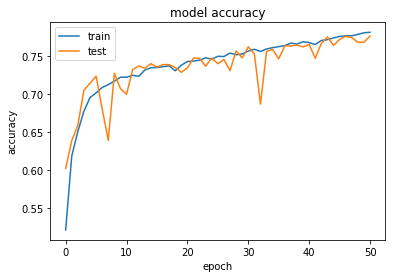

In [ ]:
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

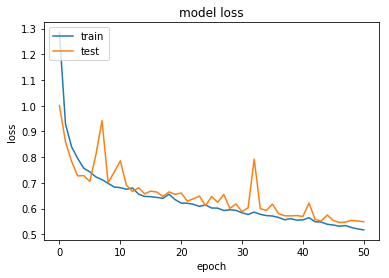

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_smote_test,y_test1)

40065/40065 [==============================] - 15s 378us/step


[0.5523409330138594, 0.7723698989142643]

In [ ]:
y_smote.sum(axis=0)/y_smote.shape[0]

array([0.07487982, 0.07487982, 0.07487982, 0.11113413, 0.06051787,
       0.14694166, 0.23212744, 0.07487982, 0.07487982, 0.07487982])

# Other models

In [ ]:
clf = RandomForestClassifier(n_estimators = 300, criterion='entropy',min_samples_split=10,bootstrap=True, max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_split=None, min_samples_leaf=1, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=True)
#ov = OneVsRestClassifier(clf)
#clf_fin = AdaBoostClassifier(base_estimator = clf, n_estimators=100,algorithm='SAMME.R',)
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf,X,tgt2,cv=10))


[0.98047966 0.96914778 0.84150885 0.84029961 0.93689603 0.93778864
 0.96138472 0.98071176 0.91248496 0.89878527]


In [ ]:
pred = clf.predict(x_test4)

NotFittedError: ignored

In [ ]:
print("Accuracy score is of {}".format(accuracy_score(pred,y_test4)))
print("#############################################")
print("Recall score is of {}".format(recall_score(pred,y_test4,average='weighted')))
print("#############################################")
print("Precision score is of {}".format(precision_score(pred,y_test4,average='weighted')))
print("#############################################")
print("F1 score is of {}".format(f1_score(pred,y_test4,average='weighted')))

In [ ]:
one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0.01, 50)

params = { 
    "base_score":st.gamma(0.001,0.8),
    "n_estimators": st.randint(3, 400),
    "max_depth": st.randint(0.1,40),
    "learning_rate": st.uniform(0.0005, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 100),
    'reg_alpha': from_zero_positive,
    'reg_lambda':from_zero_positive,
    "min_child_weight": from_zero_positive
}


reg_mod = XGBClassifier(objective='binary:logistic')

gs = RandomizedSearchCV(reg_mod, params)  
gs.fit(x_train4, y_train4)  
gs.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9402778721050946

In [ ]:
#grid_param={'estimator__lambda':[0.01,0.03,0.09,0.1,0.5,0.9,3,5],'estimator__max_depth':[100,50,10]}

clf2 = gs.best_estimator_
#grid = GridSearchCV(cf2,param_grid=grid_param)
clf2.fit(x_train4,y_train4)

XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9638270681019763,
              gamma=7.388721885677018, learning_rate=0.02581263729031337,
              max_delta_step=0, max_depth=26,
              min_child_weight=32.42583138456334, missing=None,
              n_estimators=202, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0,
              reg_alpha=18.895987097349014, reg_lambda=16.71632492595375,
              scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8496802051481626, verbosity=1)

In [ ]:
pred1 = clf2.predict(x_test4)

In [ ]:
print("CV Accuracy score is of {}".format(accuracy_score(pred1,y_test4)))
print("#############################################")
print("CV Recall score is of {}".format(recall_score(pred1,y_test4,average='weighted')))
print("#############################################")
print("CV Precision score is of {}".format(precision_score(pred1,y_test4,average='weighted')))
print("#############################################")
print("CV F1 score is of {}".format(f1_score(pred1,y_test4,average='weighted')))

CV Accuracy score is of 0.9439798195401183
#############################################
CV Recall score is of 0.9439798195401183
#############################################
CV Precision score is of 0.9438772384557506
#############################################
CV F1 score is of 0.9439112207043515


XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9814727895335547,
              gamma=15.142202866731115, learning_rate=0.04469975181599223,
              max_delta_step=0, max_depth=11, min_child_weight=23.2481498789006,
              missing=None, n_estimators=386, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0,
              reg_alpha=20.812716363943416, reg_lambda=178.73896746984744,
              scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9429914304871988, verbosity=1)